Discussed this assignment with Hyun In Park, Sang Hoon Kim, and Heeseung Hwang

**Preliminary setup:**

In [528]:
import numpy as np
import scipy.stats
import pylab as py
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


data = np.float64(np.load("MNIST.npy"))
labels = np.float32(np.load("MNIST_labels.npy"))

data = data / 255

training = data[:int(len(data) * 0.6)]
development = data[int(len(data) * 0.6):int(len(data) * 0.8)]
testing = data[int(len(data) * 0.8):]

**Part I (PCA) (a):**

While the problem asks for images of principal **components**, my guess is that it makes more sense to show images of principal **vectors**.  
Thus, I included images of both top 10 principal components and principal vectors.

In [529]:
k = 10 #can use different k as well

training_mu = training.mean(0)
training_centered = training - training_mu
U, Sigma, Vt = np.linalg.svd(training_centered, full_matrices = False)

Vk = Vt[:k] #principal vectors (stored in rows)
alpha = np.matmul(U, np.diag(Sigma))[:, :k] #principal components (stored in rows)

**Images of first 10 principal components:**

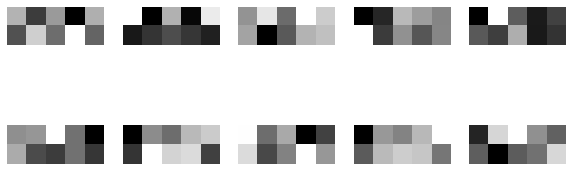

In [530]:
subset = alpha[:10]
nrows, ncols = 2, 5
plt.figure(figsize = (ncols * 2, nrows * 2))

for i in range(nrows * ncols):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(subset[i].reshape((2, 5)), cmap = "gray")
    plt.axis("off")

plt.axis("off")
plt.show()

**Images of first 10 principal vectors:**

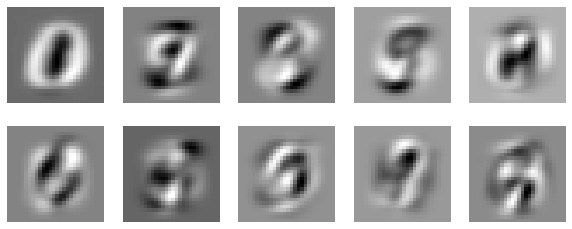

In [531]:
plt.figure(figsize = (ncols * 2, nrows * 2))

for i in range(nrows*ncols):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(Vk[i].reshape((28, 28)), cmap = "gray")
    plt.axis("off")

plt.axis("off")
plt.show()

**Part I (PCA) (b):**

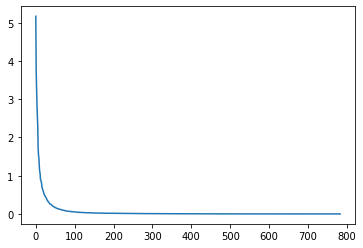

In [532]:
plt.plot(Sigma ** 2 / len(training))
plt.show()

**Part I (PCA) (c):**  

Done with 10 randomly selected datapoints from the testing set.  
Tried with m = 5, 10, 20, 50, 100

In [533]:
np.random.seed(1234)
sample = np.random.randint(14000, size = 10) #10 datapoints selected

Trial with m=5:

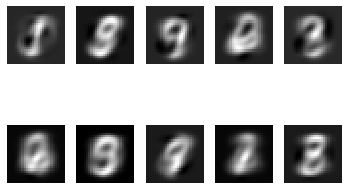

In [534]:
m = 5
testing_mu = testing.mean(0)
testing_centered = testing - testing_mu
U2, Sigma2, Vt2 = np.linalg.svd(testing_centered, full_matrices = False)

Vk2 = Vt2[:m]
alpha2 = np.matmul(U2, np.diag(Sigma2))[:, :m]
restored = []

for point in sample:
    
    x = np.matmul(Vk2.T, alpha2[point]) + testing_mu
    restored.append(x)

for i in range(nrows*ncols):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(restored[i].reshape(28,28), cmap = "gray")
    plt.axis("off")

plt.axis("off")
plt.show()

Trial with m=10:

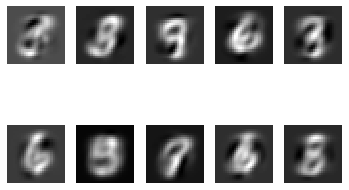

In [535]:
m = 10

Vk2 = Vt2[:m]
alpha2 = np.matmul(U2, np.diag(Sigma2))[:, :m]
restored = []

for point in sample:
    
    x = np.matmul(Vk2.T, alpha2[point]) + testing_mu
    restored.append(x)

for i in range(nrows*ncols):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(restored[i].reshape(28,28), cmap = "gray")
    plt.axis("off")

plt.axis("off")
plt.show()

Trial with m=20:

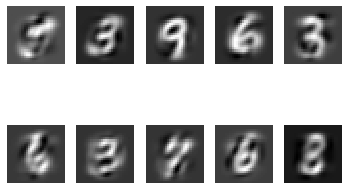

In [536]:
m = 20

Vk2 = Vt2[:m]
alpha2 = np.matmul(U2, np.diag(Sigma2))[:, :m]
restored = []

for point in sample:
    
    x = np.matmul(Vk2.T, alpha2[point]) + testing_mu
    restored.append(x)

for i in range(nrows*ncols):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(restored[i].reshape(28,28), cmap = "gray")
    plt.axis("off")

plt.axis("off")
plt.show()

Trial with m=50:

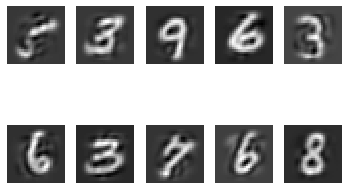

In [537]:
m = 50

Vk2 = Vt2[:m]
alpha2 = np.matmul(U2, np.diag(Sigma2))[:, :m]
restored = []

for point in sample:
    
    x = np.matmul(Vk2.T, alpha2[point]) + testing_mu
    restored.append(x)

for i in range(nrows*ncols):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(restored[i].reshape(28,28), cmap = "gray")
    plt.axis("off")

plt.axis("off")
plt.show()

Trial with m=100:

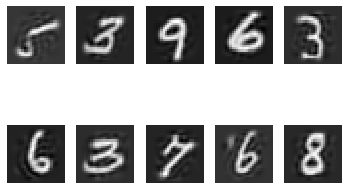

In [538]:
m = 100

Vk2 = Vt2[:m]
alpha2 = np.matmul(U2, np.diag(Sigma2))[:, :m]
restored = []

for point in sample:
    
    x = np.matmul(Vk2.T, alpha2[point]) + testing_mu
    restored.append(x)

for i in range(nrows*ncols):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(restored[i].reshape(28,28), cmap = "gray")
    plt.axis("off")

plt.axis("off")
plt.show()

With m = 5, it yields only blurred images and is really difficult to recognize the true digits represented by those images.  
With m = 10 or 20, the overall structure of each image is bit clearer, and I could discern certain digits (3, 9, 7, etc.).  
With m = 50 or 100, the images were clear enough so that I can easily determine true digits from the results.  

I would say that as m increases, the representation of images becomes rapidly more accurate, and approximately m ~ 50 or higher would be required for humans to precisely determine the true digits.  
From the results above, top principal vectors/components at the very beginning seem to capture "ink-background" border and basic structures of curves at a very rough level. For principal vectors/components that correspond to ~20th or later, they are capturing subtle details of images, including distinction between lines and curves, curvatures of curves, endpoints of lines and curves, etc. - which allow more accurate representation of digits.


**Part II (k-means):**  
Conducted clustering on the training dataset

In [539]:
datacopy = training[:]
k = 10 #Using 10 clusters since there are 10 digits
iteration = 50

np.random.seed(5000)
np.random.shuffle(datacopy)
centers = datacopy[:10] #equivalent to selecting 10 random initial centers

for i in range(iteration):    
    
    model = KMeans(n_clusters = k, init = centers, n_init = 1, max_iter = 1)
    digit_cluster = model.fit(datacopy)
    centers = model.cluster_centers_

match = model.predict(datacopy)

Cluster centers:

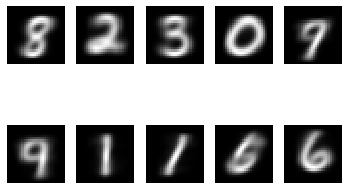

In [540]:
for i in range(nrows * ncols):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(centers[i].reshape(28, 28), cmap = "gray")
    plt.axis("off")

plt.axis("off")
plt.show()

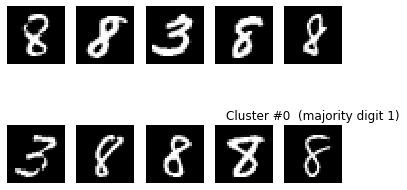

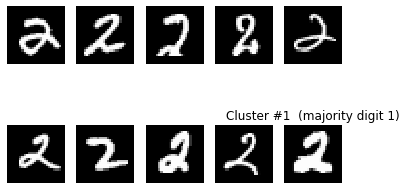

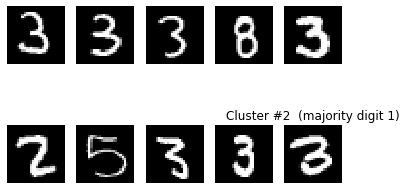

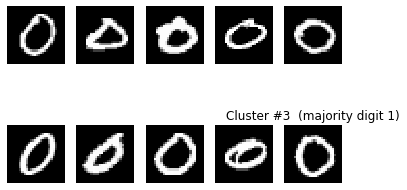

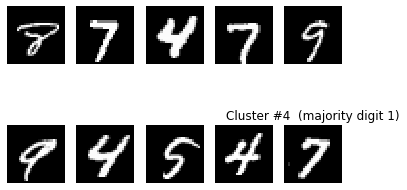

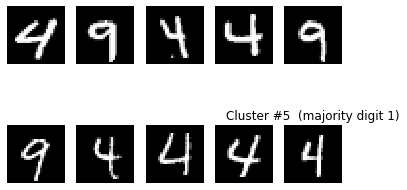

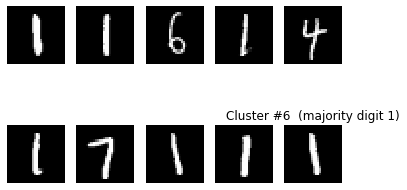

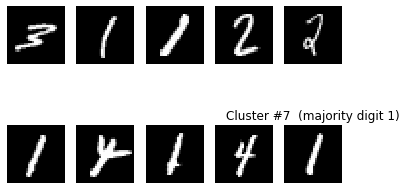

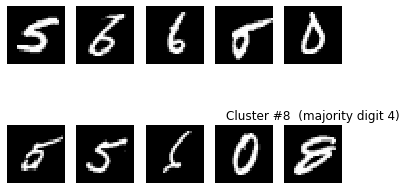

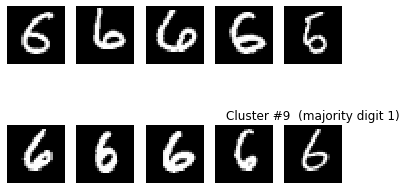

In [541]:
lab = []

for group in range(k):
    
    group_k, indx = [], []
    
    for i in range(len(datacopy)):
        if match[i] == group:
            group_k.append(datacopy[i])
            indx.append(i)
            
    lab.append([labels[j] for j in indx])        
    mode = scipy.stats.mode(lab[-1])[0][0]
    
    np.random.seed(128)
    np.random.shuffle(group_k)
    sample_k = group_k[:10]
    
    for i in range(nrows*ncols):
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(sample_k[i].reshape(28, 28), cmap = "gray")
        plt.axis("off")
    
    plt.axis("off")
    plt.title("Cluster #{:d}  (majority digit {:d})".format(group, int(mode)))
    plt.show()

Clusters do not seem to be successful in respecting the true digit labels, which is obvious from the fact that majority digits associated with almost all clusters are 1 (while sample images from each cluster clearly suggest otherwise). Majority label association is actually done by slightly greater count of 1 than other labels', as can be seen in the histogram of label distribution in cluster 0 below. (Can be checked for other clusters using the same code.)

(array([414., 465., 366., 421., 381., 402., 393., 407., 391., 374.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ],
       dtype=float32),
 <a list of 10 Patch objects>)

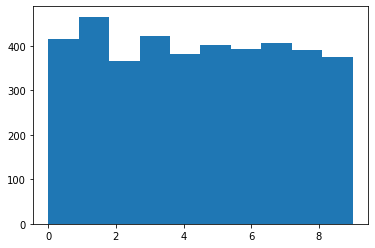

In [546]:
plt.hist(lab[0]) #can test with other numbers (1, 2, ..., 9) instead of  0

**Part III (Spectral clustering) (a):**

Used 3000 datapoints from the training set.  
Since computation of W_raw takes immensive amount of time, it is computed and stored in a separate cell prior to any urther work.

In [547]:
sample = training[:3000]
zero = [i for i in range(3000) if labels[i] == 0]
one = [i for i in range(3000) if labels[i] == 1]
two = [i for i in range(3000) if labels[i] == 2]
totalset = set(zero+one+two)

In [548]:
W_raw = np.zeros((3000, 3000))

for i in range(3000):
    for j in range(3000):       
        W_raw[i,j] = np.exp(-np.linalg.norm(sample[i] - sample[j]))

In [549]:
D, h = np.zeros((3000, 3000)), 15 #tested h = 15, 20, 25; all three yielded consistent results in terms of conclusion

W = W_raw ** (1/h)

for i in range(3000):
    D[i, i] = np.sum(W[i])

D_inv = np.linalg.inv(D)
L = np.identity(3000) - np.matmul(D_inv ** (1/2), np.matmul(W, D_inv **(1/2)))

**Part III (Spectral clustering) (b):**

In [550]:
eigval, eigvec = np.linalg.eig(L)
idx = eigval.argsort()[::-1]
eigval = eigval[idx]
eigvec = eigvec[idx]
reduce = eigvec[:, :3] #v1, v2, and v3

Text(0.5, 1.0, 'Scatterplot of embeddings of 0, 1, 2')

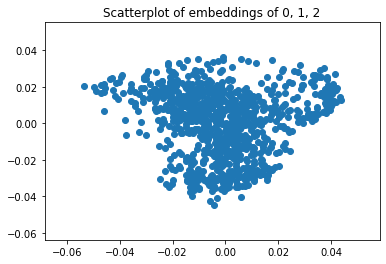

In [551]:
run = np.array([reduce[i, 1:] for i in range(3000) if i in totalset]) #embeddings of 0, 1, 2 with v2, v3 (as rows)
plt.scatter(run[:, 0], run[:, 1])
plt.title("Scatterplot of embeddings of 0, 1, 2")

In [552]:
def plotting(kmeans, x):
    '''
    Creates a plot that represents datapoints and clustering analysis result.
    
    Input: kmeans object, x (dataset in numpy array)
    
    This function returns nothing, but displays the generated plot.
    (Function taken from HW1 Q4 code)
    '''
    
    cluster = kmeans.predict(x)
    fig = py.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(x[:,0], x[:,1], "o", color = "green")
    
    for i in range(3):
        
        col = [0, 0, 0, 1]
        col[i] = 1
        ax.plot(x[cluster == i, 0], x[cluster == i, 1], "o",
                mfc = (1, 1, 1, 0), mec = col, markersize = 10)
    
    ax.plot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            "o", color = "black", markersize = 15)

In [553]:
np.random.seed(1234)

k, iteration = 3, 50 #since there are only 3 types of true digits in this case
runcopy = run[:]

np.random.shuffle(runcopy)
centers = runcopy[:k]

for i in range(iteration):    
    
    model = KMeans(n_clusters = k, init = centers, n_init = 1, max_iter = 1)
    digit_cluster = model.fit(run)
    centers = model.cluster_centers_

match = model.predict(run)

K-means clustering result:

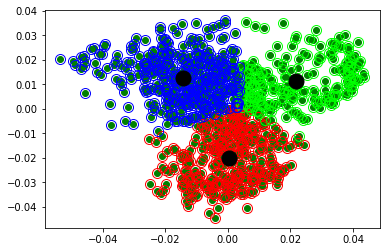

In [554]:
plotting(model, run)

**Part III (Spectral clustering) (c):**

In [555]:
def kernel(x, y):
    return np.exp(-np.linalg.norm(x - y)**2 / (2*h))

In [556]:
def cont_embed(x, data, D):
    
    n = data.shape[0]
    disx = np.zeros((n, 1))
    
    for i, d in enumerate(data):
        disx[i] = kernel(x, d)
        
    normx = np.sqrt(np.mean(disx))
    
    kx = np.zeros((n, 1))
    sqn = np.sqrt(n)
    
    for i, d in enumerate(data):
        kx[i] = disx[i] * D[i, i] / (sqn * normx)
    
    ev = eigvec.T
    yx = np.zeros(eigvec.shape[1])
    
    for k, a in enumerate(ev):
        yx[k] = np.dot(a, kx) / eigval[k]
    
    return yx

In [557]:
np.random.seed(56789)
to_test = [i for i in range(len(testing)) if labels[i+56000] == 0]
to_test = np.random.choice(new_zero, size = 100) #choosing 100 random images of zero from testing set

embed = np.zeros((len(to_test), 3000))

for j in range(len(to_test)):
    embed[j, :] = cont_embed(testing[to_test[j]], sample, D_inv**(1/2) )
#embed = embed / np.linalg.norm(embed, axis = 1, keepdims = True)

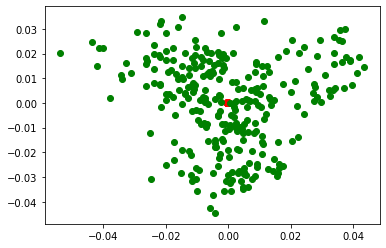

In [558]:
zero_emb = np.array([reduce[i, 1:] for i in range(3000) if i in set(zero)]) 
plt.scatter(embed[:,1], embed[:,2], color = "red")
plt.scatter(zero_emb[:,0], zero_emb[:,1], color = "green")

Here, green points are embeddings of zeros in the training data, and red points are extension of the embedding to new "zeros" selected from outside the training data. As we can see, red points are neatly gathered around the center of the distribution of green points: continuous extension of embedding consistently mapped zeros from the testing data to the place where they are "supposed to be."

**Part IV (Classification) (a):**

In [559]:
lg = LogisticRegression(fit_intercept = True, C = 100000, penalty = "l2", multi_class = "multinomial", solver = "lbfgs")

Codes in previous parts have affected the original training set. Should reload the data and do training-development-testing split (1st cell) again before proceeding:

In [560]:
data = np.float64(np.load("MNIST.npy"))
labels = np.float32(np.load("MNIST_labels.npy"))

data = data / 255

training = data[:int(len(data) * 0.6)]
development = data[int(len(data) * 0.6):int(len(data) * 0.8)]
testing = data[int(len(data) * 0.8):]

In [561]:
reg1 = lg.fit(training, labels[:42000])
error_count = 0

for i in range(len(development)):
    guess = np.argmax(reg1.predict_proba(development[i].reshape(1, -1)))
    
    if guess != labels[i+42000]:
        error_count += 1

error_rate = error_count / len(development)
print(error_rate)

0.08771428571428572


The regression model trained with the training dataset showed empirical error rate of 0.0877 on the development set. (Which is not bad!)

**Part IV (Classification) (b):**

In [562]:
#jumping by 10, otherwise there are too many k's to consider, taking immensive amount of computing time
kval = list(range(10, 785, 10))
devel_mu = development.mean(0)
error_rate = []

for k in kval:

    error_count, V, alpha_t = 0, Vt[:k], np.matmul(U, np.diag(Sigma))[:, :k]
    reg2 = lg.fit(alpha_t, labels[:42000])
    alpha_d = np.array([np.matmul(V, development[i] - training_mu) for i in range(len(development))])
    
    for i in range(len(development)):
        guess = np.argmax(reg2.predict_proba(alpha_d[i].reshape(1, -1)))
        
        if guess != labels[i+42000]:
            error_count += 1
    
    error_rate.append(error_count / len(development))

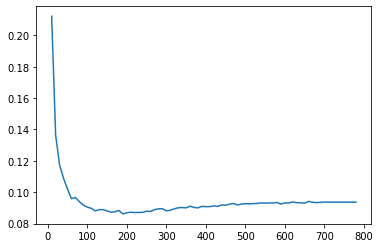

In [563]:
plt.plot(kval, error_rate)

In the plot above, x-axis represents the k value, and y-axis represents the error rate.  
We can see that while error rate rapidly decreases up until $k\approx200$, error rate does not change much after that point. For $k>200$ range, it is also observable that the error rate begins to increase at a slightly positive slope, suggesting that the optimal value of k should be somewhere around 200.

**Part IV (Classification) (c):**

In [564]:
k_optimal = kval[np.argmin(error_rate)]
new_train = data[:int(len(data) * 0.8)]
new_mu = new_train.mean(0)

U_n, Sigma_n, Vt_n = np.linalg.svd(new_train - new_mu, full_matrices = False)
V_n = Vt_n[:k_optimal]
alpha_n = np.matmul(U_n, np.diag(Sigma_n))[:, :k_optimal]
alpha_t = np.array([np.matmul(V_n, testing[i] - new_mu) for i in range(len(testing))])
reg3 = lg.fit(alpha_n, labels[:int(len(data) * 0.8)])

error_count = 0

for i in range(len(testing)):
    guess = np.argmax(reg3.predict_proba(alpha_t[i].reshape(1, -1)))
    
    if guess != labels[i + int(len(data) * 0.8)]:
        error_count += 1
    
error_rate = error_count / len(testing)
print(error_rate)

0.06678571428571428


Here, the error rate on the testing set was 0.0668, which is even lower than the error rate based on the model using the raw features (0.0877).  
Although this is not necessarily the evidence that this model is better than the raw-feature model since error rate is obtained from different datasets (development vs. testing), we can still see that both error rates are within a comparably close range.  
Therefore, we can conclude that the regression model based on principal components with the optimal k can perform as well as the model with raw features, while avoiding burdensome computation of the full dimension of the original data.